## Постановка задачи

В наборе данных большое количество признаков - есть возможность исследовать влияние признаков, поработать с уменьшением размерности, посмотреть зависимости между ними.

В рамках постановки задачи:
* Построить корреляционую матринцу независимых переменных, а также гистограммы распределения каждой переменной.
* Понизить размерность задачи по возможности
* Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
* Предиктивная аналитика (линейная регрессия, логистическая регрессия)


Исходные данные:
https://www.kaggle.com/shebrahimi/financial-distress?select=Financial+Distress.csv

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
%matplotlib inline

Загрузка данных

In [2]:
data = pd.read_csv("Financial Distress.csv", sep=",")
data.shape
data.head(2)

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.281,0.022934,0.87454,1.2164,0.06094,0.18827,0.52510,...,85.437,27.07,26.102,16.0,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.270,0.006454,0.82067,1.0049,-0.01408,0.18104,0.62288,...,107.090,31.31,30.194,17.0,16.0,0.4,22,0.010636,31,50


In [3]:
data.shape

(3672, 86)

In [4]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [5]:
data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896773,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


### Пропуски в данных

In [6]:
# посмотрим пропуски в данных
for col_name in data.columns:
    if data[col_name].count() != data.shape[0]:
        print(col_name)

Пропусков в данных нет - уже хорошо

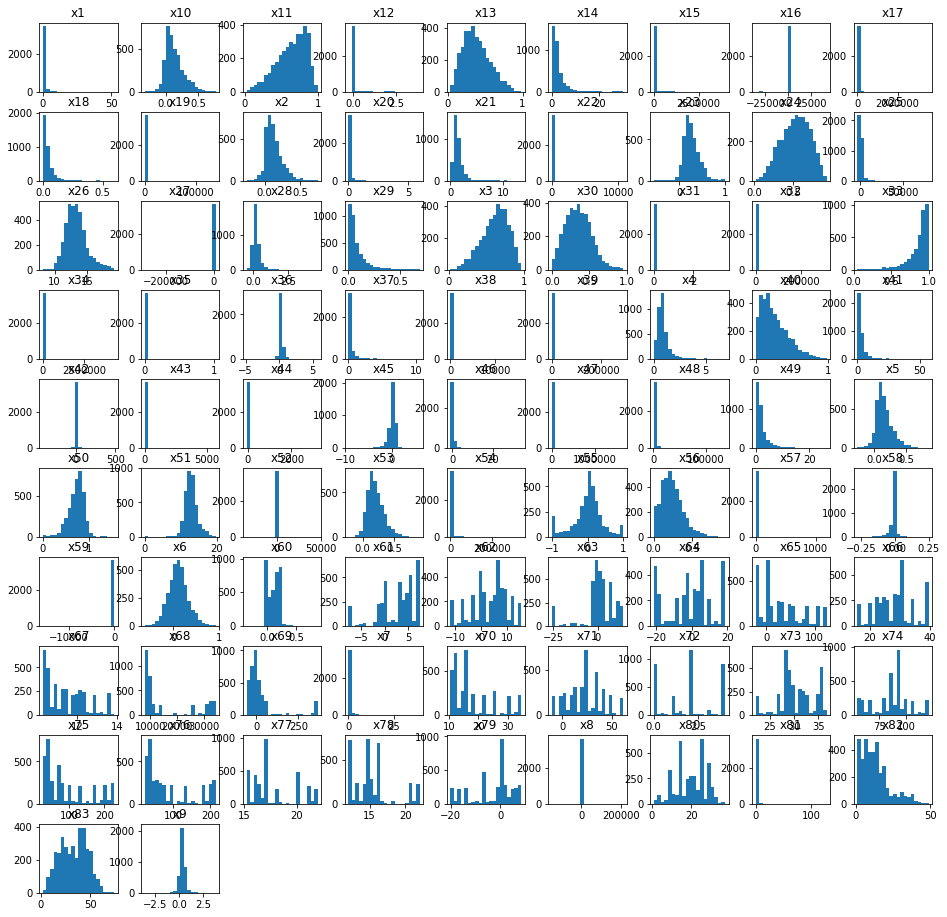

In [7]:
# Посмотрим значения - на что похожи данные
df_num_features = data
target = data['Financial Distress']
df_num_features.drop(['Company', 'Time', 'Financial Distress'], axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=False);


In [11]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif

                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

## "Нулевая" модель - линейная регрессия на всех данных 

От нее потом будем отсчитывать потерю информации

In [38]:
X = df_num_features
y = pd.DataFrame(target)
X = reduce_mem_usage(X)
y = reduce_mem_usage(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
R2_lr = r2_score(y_pred, y_test)
round(R2_lr, 4)

Memory usage of dataframe is 1.13 MB
Memory usage after optimization is: 1.13 MB
Decreased by 0.0%
Memory usage of dataframe is 0.03 MB
Memory usage after optimization is: 0.01 MB
Decreased by 49.9%


-21.0682

## Корреляции и понижение размерности

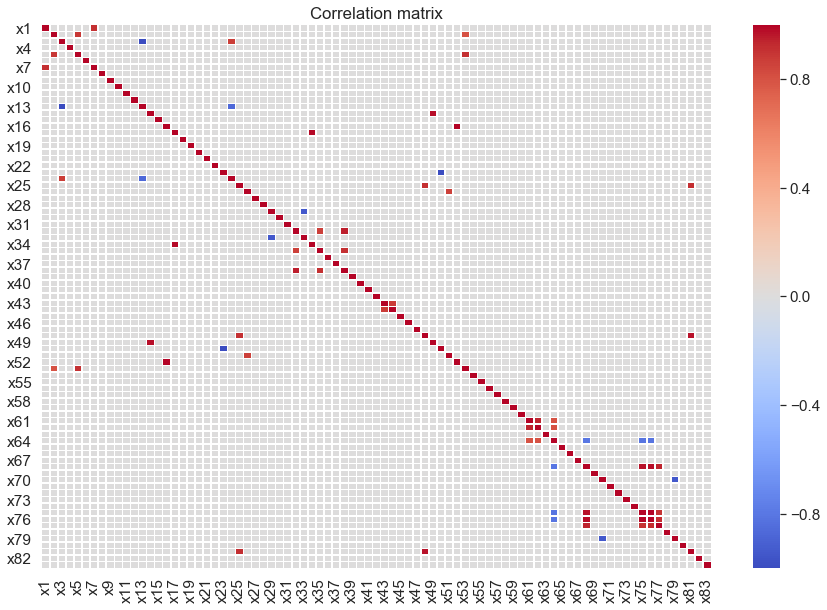

In [39]:
# Признаков много - посмотрим значительные корреляции более 0.8
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.8] = 0  
# Поскольку переменных очень много смотрим только сильную зависимость

sns.heatmap(corr_matrix, annot=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Около 20-и факторов имеют корреляцию более 0.8 - имеет смысл работать над снижением размерности.

Факторы имеющие значительные корреляции:

In [40]:
nums = 0 # количество факторов с корреляцией выше 0.8
for col_name in corr_matrix.columns:
    res = corr_matrix.loc[((corr_matrix[col_name] >= 0.8) | (corr_matrix[col_name] <= -0.8)) &
                          (corr_matrix[col_name] != 1) & (corr_matrix[col_name] != -1), 
                          col_name] 
    if res.shape[0] > 0:
#         print(res, nums)
        nums += 1
n_comp = corr_matrix.shape[0] - nums # количество факторов, которые оставляем в модели
print(n_comp, nums)

50 33


### Понижение размерности

In [41]:
pca = PCA(n_components = n_comp)
data_pca = pd.DataFrame(pca.fit_transform(df_num_features))

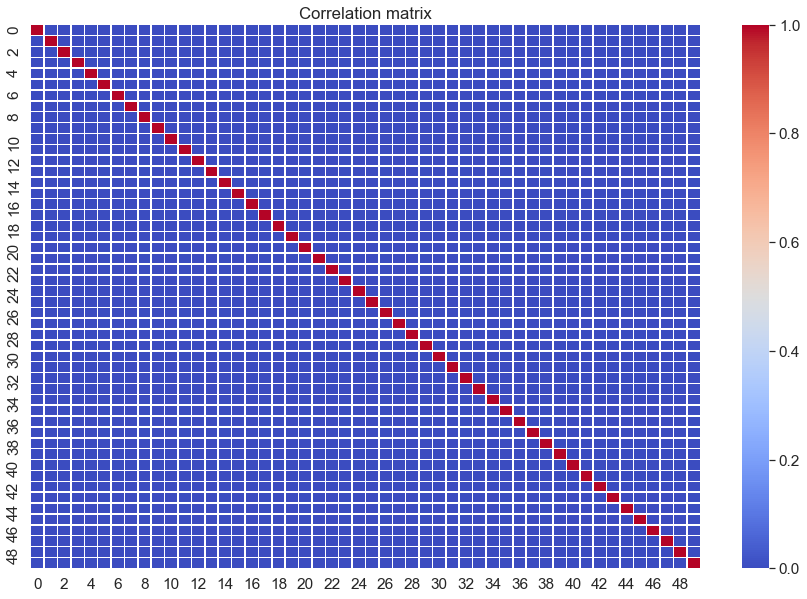

In [42]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = data_pca.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.8] = 0  
# Поскольку переменных очень много смотрим только сильную зависимость

sns.heatmap(corr_matrix, annot=False, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

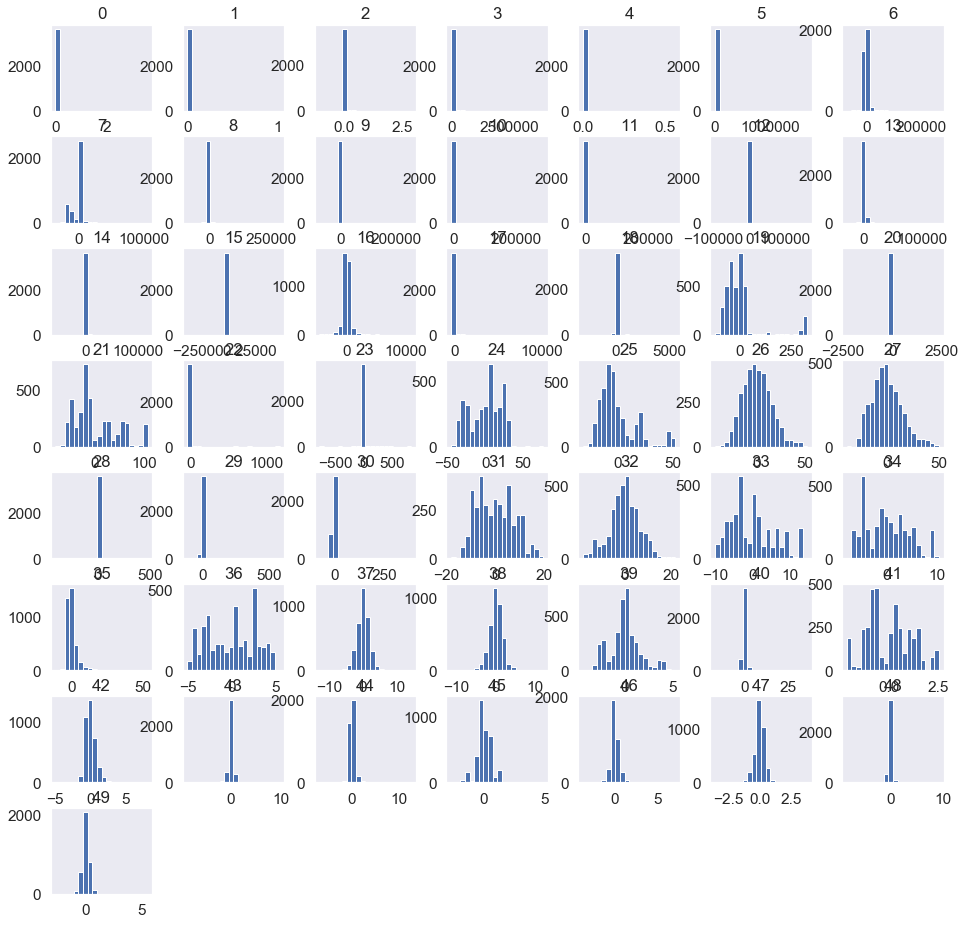

In [43]:
df_num_features = data_pca
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


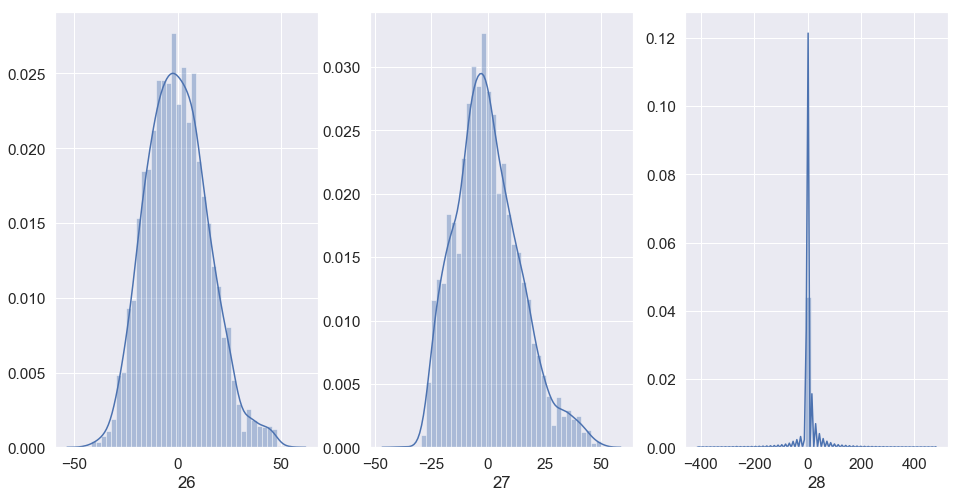

In [44]:
plt.figure(figsize = (16, 8))

plt.subplot(131)
sns.distplot(df_num_features[26], bins=40)

plt.subplot(132)
sns.distplot(df_num_features[27], bins=40)

plt.subplot(133)
sns.distplot(df_num_features[28], bins=40)

plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


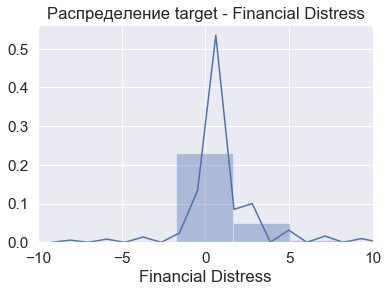

In [45]:
plt.title(f'Распределение target - Financial Distress')
sns.distplot(target, bins=40)
plt.xlim(-10, 10)
plt.show()

In [46]:
class Model:
    def __init__(self,dataframe,y_name,X_names):
        self.y_name = y_name
        self.X_names = X_names
        self.no_ones_X = np.array(dataframe[X_names])
        self.k = self.no_ones_X.shape[1] + 1
        self.n = self.no_ones_X.shape[0]
        self.y = np.array(dataframe[y_name]).reshape(self.n,-1)
        self.X = np.hstack((np.ones(self.n).reshape(self.n,-1),self.no_ones_X))
        self.b =  np.dot(np.linalg.inv(np.dot(self.X.T, self.X)),np.dot(self.X.T,self.y))
        self.y_estimated = np.dot(self.X,self.b)
        self.residuals = self.y - self.y_estimated
        self.TSS = sum((self.y-np.mean(self.y)) **2 )
        self.RSS = sum((self.y-self.y_estimated) **2 )
        self.ESS = self.TSS - self.RSS
        self.R2 = self.ESS / self.TSS
        self.sigma = self.RSS / (self.n - self.k)
        self.R2_adjusted = 1 - self.sigma/(self.TSS/(self.n-1))
        self.AIC = self.n * np.log(self.RSS / self.n) + 2 * self.k
        self.BIC = self.n * np.log(self.RSS / self.n) + np.log(self.n) * self.k
        self.b_correlation = self.sigma * np.linalg.inv(np.dot(self.X.T, self.X))
        self.b_std = np.array([[va ** (1/2) for j,va in enumerate(val) if j==i] for i,val in enumerate(self.b_correlation)])
        self.X_mean = self.no_ones_X.mean(axis=0)
        self.X_var = self.no_ones_X.var(axis=0,ddof=1)
        self.X_std = self.no_ones_X.std(axis=0,ddof=1)
        self.X_centred = self.no_ones_X - self.X_mean
        self.X_centr_stand = self.X_centred / self.X_std
        self.X_correlation = np.dot(self.X_centr_stand.T,self.X_centr_stand) / (self.n-1)
    def draw_X_correlation(self):
        def highlight_corr(val):
            if ((val > -0.999 and val < -0.8) or (val < 0.999 and val > 0.8)):
                color = 'DodgerBlue'
            elif ((val >= -0.8 and val < -0.6) or (val <= 0.8 and val > 0.6)):
                color = 'DeepSkyBlue'
            elif ((val >= -0.6 and val < -0.4) or (val < 0.6 and val > 0.4)):
                color = 'LightSkyBlue'
            else:
                color = ''
            return f'background-color:{color}'
        output_df = pd.DataFrame(self.X_correlation,index=self.X_names,columns=self.X_names)
        display(output_df.style.set_caption('Корреляционная матрица независимых переменных').applymap(highlight_corr))
    def draw_b_correlation(self):
        intercept_names = ['Intercept'] + self.X_names
        output_df = pd.DataFrame(self.b_correlation,index=intercept_names,columns=intercept_names)
        display(output_df.style.set_caption('Корреляционная матрица оценок МНК'))
    def stats(self, norm=False):
        intercept_names = ['Intercept'] + self.X_names
        stat_observable = self.b / self.b_std
        if norm:
            p_value = np.round(2*(1 - scipy.stats.norm.cdf(abs(stat_observable))),5)
        else:
            p_value = np.round(2*(1 - scipy.stats.t.cdf(abs(stat_observable),self.n - self.k)),5)
        output_array = np.vstack((self.b.T, self.b_std.T,p_value.T,stat_observable.T))
        output_df = pd.DataFrame(data=output_array,index=['Оценки МНК','Стандартное отклонение оценок','p-значения','наблюдаемое значение'], columns=intercept_names).astype(object)
        display(output_df)
        quantiles_1 = scipy.stats.norm.ppf(0.995) if norm else scipy.stats.t.ppf(0.995,self.n - self.k)
        quantiles_5 = scipy.stats.norm.ppf(0.975) if norm else scipy.stats.t.ppf(0.975,self.n - self.k)
        print(f'Квантиль  5% уровня значимости: {quantiles_5:.2f} Квантиль 1% уровня значимости: {quantiles_1:.2f}')
    def quality(self):
        f_observed = (self.ESS/(self.k-1)) / (self.RSS/(self.n - self.k))
        f_crit = scipy.stats.f.ppf(0.95, self.k-1, self.n - self.k)
        f_pvalue = 1 - scipy.stats.f.cdf(f_observed, self.k-1, self.n - self.k)
        print(f'Значения F-статистики наблюдаемое: {f_observed[0]:.2f}, критическое: {f_crit:.2f}, p-значение: {f_pvalue[0]:.4f}')
        print(f'Показатели качества модели R^2: {self.R2[0]:.4f} R^2 adjusted: {self.R2_adjusted[0]:.4f}, AIC: {self.AIC[0]:.2f}, BIC: {self.BIC[0]:.2f}') 
    def summary(self,norm=False):
        self.stats(norm)
        self.quality()
    def sm_summary(self):
        est = sm.OLS(self.y, self.X)
        est2 = est.fit()
        display(est2.summary())

In [49]:
data_pca_model = data_pca.copy()
data_pca_model.rename(columns=lambda x: 'n'+str(x), inplace=True)
data_pca_model['f_distress'] = target
data_pca_model.head(3)

,n0,n1,n2,n3,n4,n5,n6,n7,n8,n9,...,n41,n42,n43,n44,n45,n46,n47,n48,n49,f_distress
0,-365901.589419,-68780.094781,-100179.739978,-8271.863963,-3536.817664,-1587.771018,-5620.468475,6021.438117,-221.998283,225.153891,...,0.319665,-1.468573,0.682927,1.501357,0.464155,0.450199,-0.171102,-0.317933,-0.580435,0.010636
1,-365900.517225,-68761.521955,-100182.014431,-8272.485623,-3535.161775,-1586.631186,-5466.492540,5728.735978,-221.995092,210.476610,...,1.430720,-0.989526,0.542236,0.795373,0.121295,-0.100366,-0.315922,-0.107708,-0.307411,-0.455970
2,-365900.611902,-68712.768343,-100180.897813,-8273.639620,-3534.933438,-1574.307195,-5326.005885,5336.792570,-224.820720,193.917798,...,-0.929818,-1.016287,0.073621,0.795915,0.001676,-0.932080,-0.207672,-0.479542,-0.804512,-0.325390


In [50]:
dependent = 'f_distress'
independent = list(data_pca_model.columns)[:-1]
model_1 = Model(data_pca_model,dependent,independent)

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


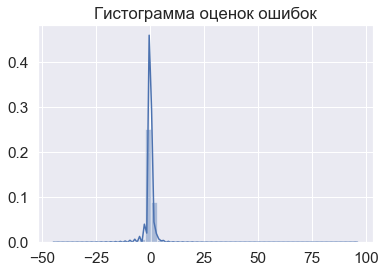

In [51]:
plt.title(f'Гистограмма оценок ошибок')
sns.distplot(model_1.residuals)
plt.show()

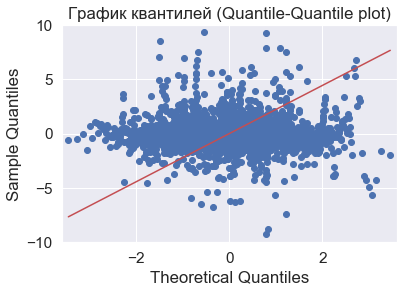

In [52]:
from statsmodels.graphics.gofplots import qqplot
qqplot(model_1.residuals, line='s')
plt.title('График квантилей (Quantile-Quantile plot)')
plt.ylim(-10, 10)
plt.show()

In [55]:
model_2 = Model(data_pca_model,dependent,independent)
model_2.summary(norm=True)

,Intercept,n0,n1,n2,n3,n4,n5,n6,n7,n8,...,n40,n41,n42,n43,n44,n45,n46,n47,n48,n49
Оценки МНК,1.04026,3.35966e-09,-1.79403e-09,2.14366e-07,6.1291e-07,1.52565e-07,-1.09961e-06,3.90936e-05,-3.8478e-06,3.04159e-06,...,0.056201,0.0357807,-0.145012,0.285558,-0.183861,0.00816067,0.141308,1.42828,-0.132406,-0.646668
Стандартное отклонение оценок,0.0367987,4.43659e-09,1.57431e-08,2.71955e-08,3.38671e-07,3.79469e-07,8.07308e-07,2.93944e-06,3.91541e-06,5.33377e-06,...,0.0275345,0.0326245,0.0469713,0.0609857,0.0618378,0.0627477,0.0694302,0.0913528,0.101833,0.10996
p-значения,0,0.44889,0.90927,0,0.07033,0.68765,0.17318,0,0.32574,0.56851,...,0.04124,0.27275,0.00202,0,0.00295,0.89652,0.04183,0,0.19352,0
наблюдаемое значение,28.2688,0.757261,-0.113956,7.88242,1.80975,0.402049,-1.36207,13.2997,-0.982733,0.570251,...,2.04111,1.09674,-3.08726,4.68238,-2.97328,0.130055,2.03525,15.6347,-1.30022,-5.88092


Квантиль  5% уровня значимости: 1.96 Квантиль 1% уровня значимости: 2.58
Значения F-статистики наблюдаемое: 31.44, критическое: 1.35, p-значение: 0.0000
Показатели качества модели R^2: 0.3027 R^2 adjusted: 0.2931, AIC: 5940.19, BIC: 6256.83


In [60]:
dependent = 'Financial Distress'
independent = list(data.columns[1:])

In [61]:
model_1 = Model(data,dependent,independent)
model_1.summary(norm=True)

,Intercept,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
Оценки МНК,-151.651,0.0960084,7.80734,-19211.5,-1.54392,3.13215,-7327.08,0.0341243,0.00173141,2.40796,...,-10.995,72.4619,-25.6958,-119.319,576.02,-376.314,0.00501149,0.964205,7.94816e-06,-0.00101158
Стандартное отклонение оценок,9384.51,0.0916207,1.37407,8626.22,0.224695,0.958264,7756.5,0.143515,0.00272212,0.223328,...,15.3445,47.7551,52.8242,242.854,638.889,550.301,0.00488127,0.0682769,0.00495863,0.00339147
p-значения,0.98711,0.29469,0,0.02594,0,0.00108,0.34484,0.81206,0.52474,0,...,0.47365,0.12917,0.62665,0.6232,0.36727,0.49408,0.30457,0,0.99872,0.76549
наблюдаемое значение,-0.0161598,1.04789,5.68192,-2.2271,-6.87121,3.26857,-0.944636,0.237774,0.636052,10.7822,...,-0.716546,1.51737,-0.48644,-0.491319,0.901597,-0.683833,1.02668,14.122,0.00160289,-0.298273


Квантиль  5% уровня значимости: 1.96 Квантиль 1% уровня значимости: 2.58
Значения F-статистики наблюдаемое: 30.48, критическое: 1.27, p-значение: 0.0000
Показатели качества модели R^2: 0.4135 R^2 adjusted: 0.4000, AIC: 5370.72, BIC: 5892.23


In [62]:
pd.DataFrame(data = [[model_1.R2[0],model_2.R2[0]],[model_1.AIC[0],model_2.AIC[0],]],index=['R^2','AIC'],columns=['Модель №1','Модель №2']).astype(object)

,Модель №1,Модель №2
R^2,0.413548,0.302746
AIC,5370.72,5940.19
